# The sinusoidal shape of crime
In this notebook we will analyse the behaviour of crime in the city of San Francisco.

## Initial setup
We will use R to analyse and visualize the data. Firs, we will load he required R packages (ggplot2 and plyr) and the dataset, extracted from San Francisco's Open Data portal (https://data.sfgov.org/)

In [1]:
library(ggplot2)
library(plyr)
sfData = read.csv('sanfrancisco_incidents_summer_2014.csv')

Warning message:
: package ‘ggplot2’ was built under R version 3.1.3Warning message:
: package ‘plyr’ was built under R version 3.1.3

## Temporal behaviour
The first analysis will be a temporal behaviour of crime. In the following line chart we present the number of crimes by date, coloured by crime caegory. We can clearly see that all types of crime present a random oscillation around their mean. The most noticeable outcome of this analysis is that there is a crime category that happens much more often than the others.

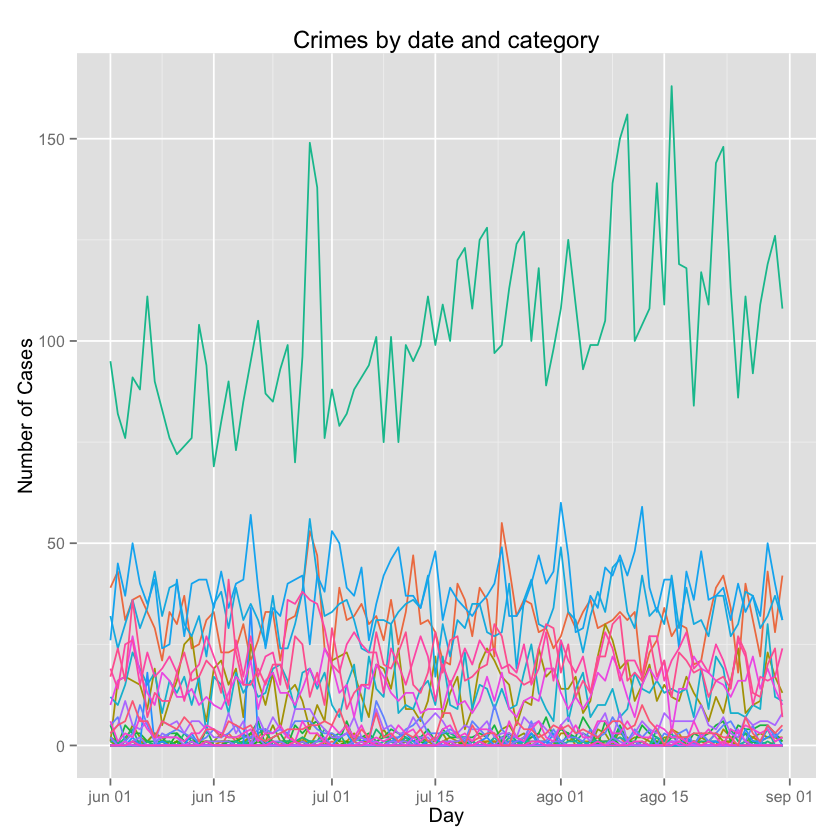

In [2]:
tab1 <- as.data.frame(table(sfData$Date, sfData$Category))
p1 <- ggplot(data=tab1, aes(x=as.Date(Var1, format="%m/%d/%Y"), y=Freq, colour=Var2)) 
p1 <- p1 + geom_line()
p1 <- p1 + xlab("Day")
p1 <- p1 + ylab("Number of Cases")
p1 <- p1 + ggtitle("Crimes by date and category")
p1 <- p1 + theme(legend.position="none")
p1

## Crimes by category
As we have seen before, there is a category of crime that highlights on the others. We will plot a bar chart to compare the number of crimes by category. We use the same colours as in the previous chart, for easier comparison. Now we have discovered that "Larceny / Theft" is the most common crime in San Francisco.

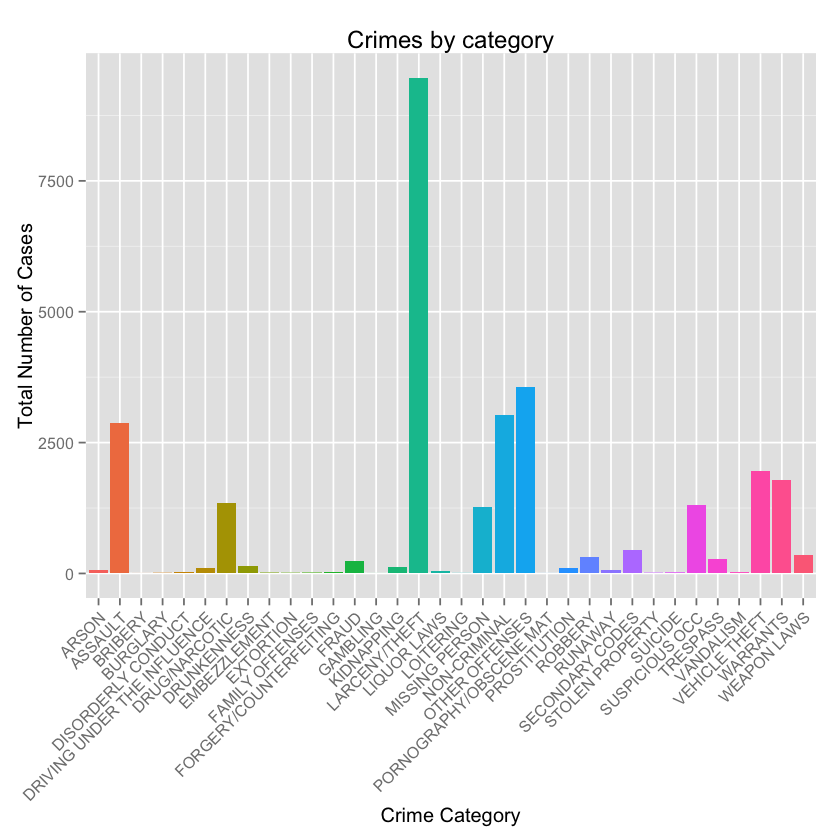

In [3]:
p2 <- ggplot(data=sfData, aes(x=Category, fill=Category))
p2 <- p2 + geom_bar()
p2 <- p2 + xlab("Crime Category")
p2 <- p2 + ylab("Total Number of Cases")
p2 <- p2 + ggtitle("Crimes by category")
p2 <- p2 + theme(legend.position="none")
p2 <- p2 + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p2

## Behaviour of thefts along the day
Let's focus then our analysis on Thefts. We want to see how they behave during the day. Therefore, we group the thefts by hour and plot a line chart with the count of events. We can start to see that there is a sinusoidal trend in this data. The late afternoon, the evening and the first ours of the night seem to be more dangerous. Specially, a 7 PM we should be more careful.

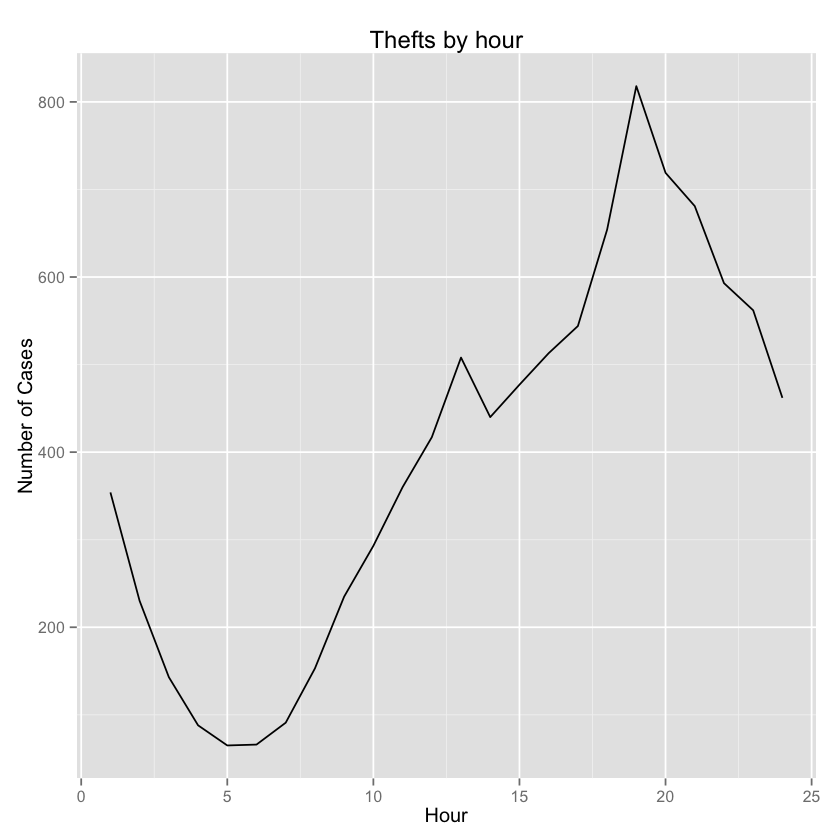

In [4]:
sfDataTheft <- subset(sfData, Category=="LARCENY/THEFT")
tab3 <- as.data.frame(table(substr(as.character(sfDataTheft$Time),1,2)))
tab3$Var1 <- as.integer(tab3$Var1)
p3 <- ggplot(data=tab3, aes(x=Var1, y=Freq)) 
p3 <- p3 + geom_line()
p3 <- p3 + xlab("Hour")
p3 <- p3 + ylab("Number of Cases")
p3 <- p3 + ggtitle("Thefts by hour")
p3 <- p3 + theme(legend.position="none")
p3

We have seen the behaviour of the total number of thefts by hour for the whole analysis period. To gain a deeper understanding of the patterns, let's find the min, mean and max number of thefts by hour, considering each day independently. We still see the sinusoidal shape, but now we also know that, in the most dangerous hour (7 PM) the number of thefts can vary between 2 and 21. So, all days are not equally dangerous.

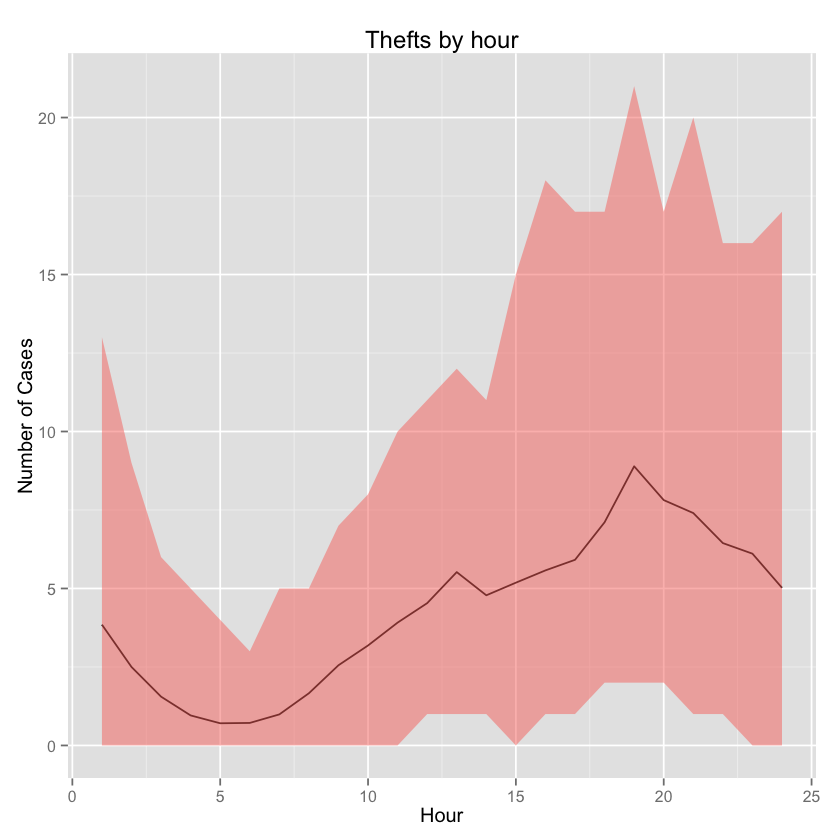

In [5]:
library(plyr)
sfDataTheft$Hour <- as.integer(substr(as.character(sfDataTheft$Time),1,2))
tab4 <- as.data.frame(table(sfDataTheft$Date, sfDataTheft$Hour))
dt4 <- ddply(tab4,~Var2,summarise,mean=mean(Freq),max=max(Freq),min=min(Freq))
dt4$Var2 <- as.integer(dt4$Var2)
p4 <- ggplot(data=dt4, aes(x=Var2, y=mean, ymin=min, ymax=max, fill='theft'))
p4 <- p4 + geom_line()
p4 <- p4 + geom_ribbon(alpha=0.5)
p4 <- p4 + xlab("Hour")
p4 <- p4 + ylab("Number of Cases")
p4 <- p4 + ggtitle("Thefts by hour")
p4 <- p4 + theme(legend.position="none")
p4

Finally, let's compare the hourly behaviour of thefts with the other types of crime. In this comparison we can also observe a sinus for the other crimes. However, it is clear that the increase in these crimes starts a bit earlier, and the peaks of acivity come around 12 AM and 6 PM.

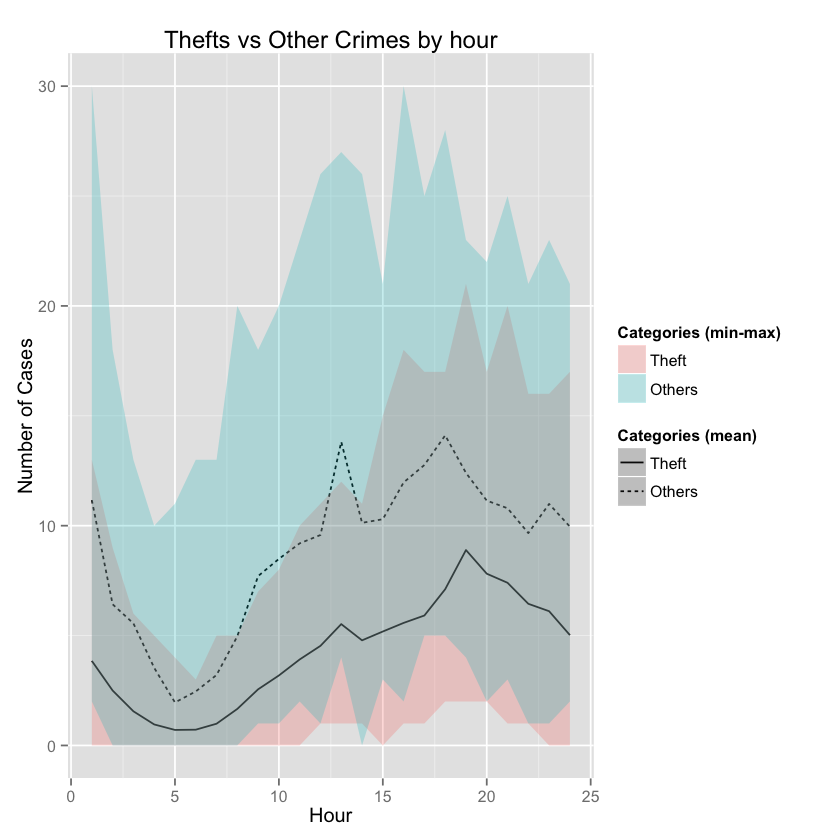

In [6]:
sfData$Hour <- as.integer(substr(as.character(sfData$Time),1,2))
sfData$IsTheft <- factor("No", levels=c("Yes", "No"))
sfData[sfData$Category=="LARCENY/THEFT",]$IsTheft <- "Yes"
tab5 <- as.data.frame(table(sfData$Date, sfData$Hour, sfData$IsTheft))
dt5 <- ddply(tab5,~Var2+Var3,summarise,mean=mean(Freq),max=max(Freq),min=min(Freq))
dt5$Var2 <- as.integer(dt5$Var2)
p5 <- ggplot(data=dt5, aes(x=Var2, y=mean, ymin=min, ymax=max, fill=Var3, linetype=Var3))
p5 <- p5 + geom_line()
p5 <- p5 + geom_ribbon(alpha=0.25)
p5 <- p5 + xlab("Hour")
p5 <- p5 + ylab("Number of Cases")
p5 <- p5 + ggtitle("Thefts vs Other Crimes by hour")
p5 <- p5 + scale_fill_discrete(name="Categories (min-max)", labels=c("Theft", "Others"))
p5 <- p5 + scale_linetype_discrete(name="Categories (mean)", labels=c("Theft", "Others"))
p5